In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import scipy.signal
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt

In [4]:
from sonar import sonar
import torch

Creating a circle

In [5]:
plt.figure(figsize=[5,5])

def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))


<Figure size 500x500 with 0 Axes>

Create kernenls, perform convolution

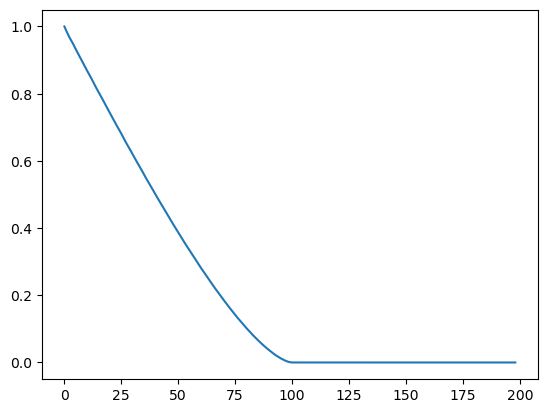

In [6]:

showcase1=[]
rad_ = 200
a_masks = []
a_conv = []
rad_cell=50
conveds = []

mat = create_mat(radius=rad_cell,size=1000)

for r in range(1,rad_):
#     plt.subplot(6,7,r)
    rad = r
    # mat = np.roll(mat,200,0)+np.roll(create_mat(radius=rad_cell-25,size=1000),-200,0)
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    conved = signal.fftconvolve(mat,kernel,mode='same')
    conveds.append(conved.copy())
    a_conv.append(conved.sum())
    showcase1.append((conved*mat).sum()/conved.sum())
    a_masks.append(kernel.sum())
    
plt.plot(showcase1)
showcase1=np.array(showcase1)
showcase1=np.array(showcase1)
a_masks=np.array(a_masks)
a_conv =np.array(a_conv)
conveds = np.array(conveds)


Cheking kernels and convolution

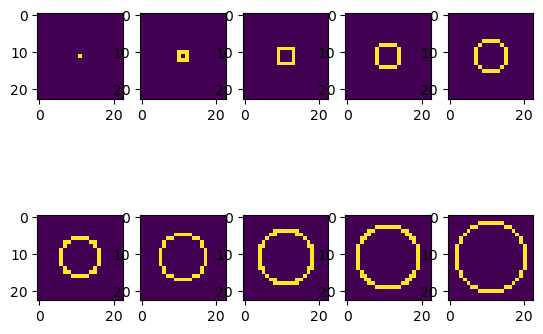

In [7]:
rad_ = 11
for r in range(1,rad_):
    plt.subplot(2,5,r)
    rad = r
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    plt.imshow(kernel)

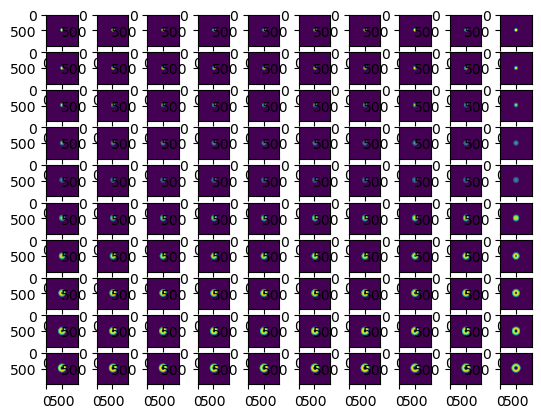

In [8]:
rad_ = 101
a_masks = []
a_conv = []
rad_cell=50
conveds = []

for r in range(1,rad_):
    plt.subplot(10,10,r)
    rad = r
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    conved = signal.fftconvolve(mat,kernel,mode='same')
    conveds.append(conved.copy())
    plt.imshow(conved)

Showcase 0, single circle. Using sonar

(2, 600, 600)


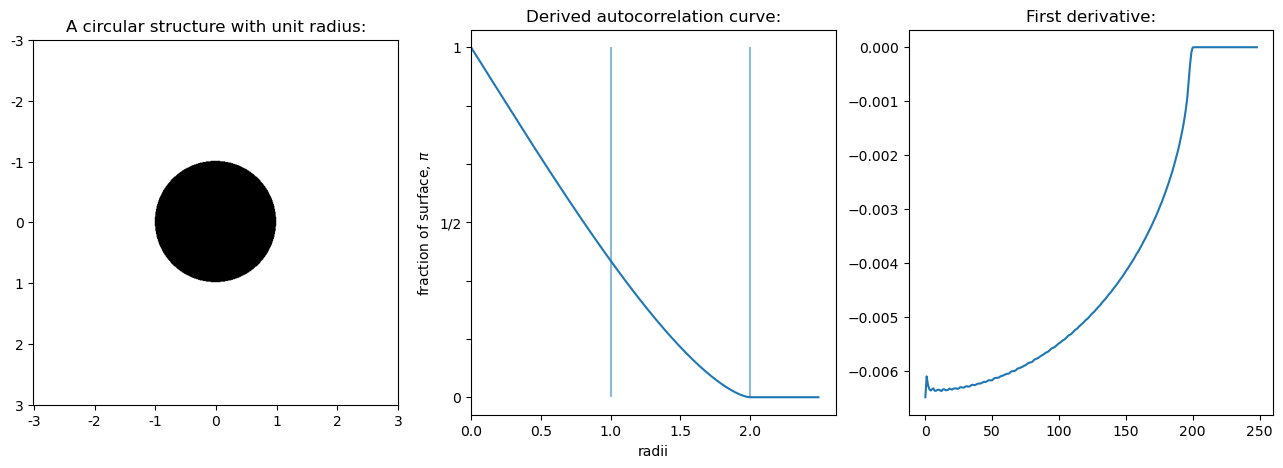

In [16]:
plt.figure(figsize=[16,5])

showcase0=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.array([create_mat(radius=rad_cell,size=600)])
mat = np.concatenate([mat,1-mat],axis=0)
print(mat.shape)


son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True,edge_correction=True)
#radii, 
co_occurrence = son.co_occurrence_from_tensor(hists=mat, interpolate=True)
showcase0 = co_occurrence[0,0].flatten()#/son.kernel_areas[::-1]


plt.subplot(1,3,1)
plt.imshow(mat[0].squeeze(),cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    
plt.title('A circular structure with unit radius:')


plt.subplot(1,3,2)
plt.plot(showcase0)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0,1,7)
ytix = ['0','','','1/2','','','1',]
plt.yticks(ylox,ytix)    
plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')
plt.vlines([rad_cell,rad_cell*2],0,showcase0.max(),alpha=0.5)
plt.xlim(0,None)


plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(showcase0)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

# plt.savefig('./output/unit_circle.svg')

Showcase 1. A boolean noise: p(x=1)=0.5. Using sonar

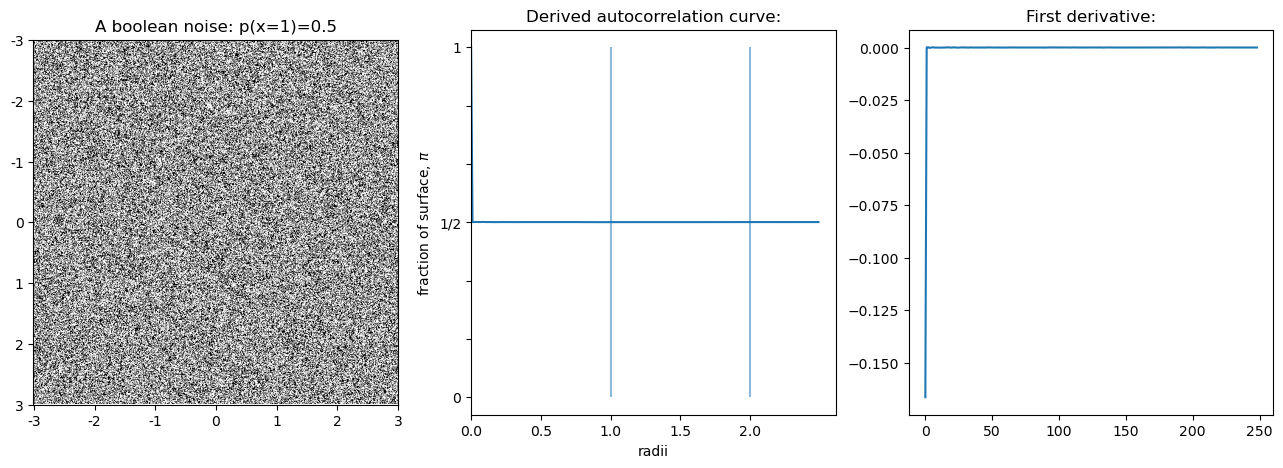

In [18]:
plt.figure(figsize=[16,5])


showcase1=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.random.random([1,600,600])>0.5#create_mat(radius=rad_cell,size=600)
mat = np.concatenate([mat,1-mat],axis=0)


son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True,edge_correction=True)
# radii, 
co_occurrence = son.co_occurrence_from_tensor(hists=mat, interpolate=True)
showcase1 = co_occurrence[0,0].flatten()#/son.kernel_areas[::-1]


plt.subplot(1,3,1)
plt.imshow(mat.argmax(0),cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    
plt.title('A boolean noise: p(x=1)=0.5')


plt.subplot(1,3,2)
plt.plot(showcase1)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')
ylox = np.linspace(0,1,7)
ytix = ['0','','','1/2','','','1',]
# ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox,ytix)    

plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')
plt.vlines([rad_cell,rad_cell*2],0,showcase1.max(),alpha=0.5)
plt.xlim(0,None)


plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(showcase1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

# plt.savefig('./output/bool_noise.svg')

Showcase 2. A boolean noise: p(x=1)=0.1. Using sonar

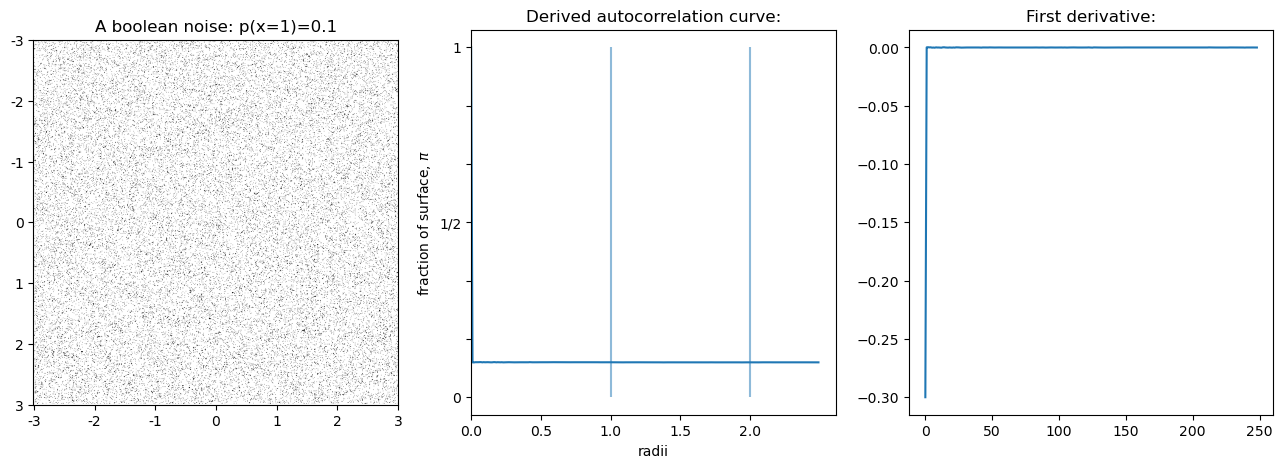

In [20]:
plt.figure(figsize=[16,5])

showcase2=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.random.random([1,600,600])<0.1
mat = np.concatenate([mat,1-mat],axis=0)

son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True,edge_correction=True)
#radii, 
co_occurrence = son.co_occurrence_from_tensor(hists=mat, interpolate=True)
showcase2 = co_occurrence[0,0].flatten()#/son.kernel_areas[::-1]


plt.subplot(1,3,1)
plt.imshow(mat[0].squeeze(),cmap='Greys')

xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    
plt.title('A boolean noise: p(x=1)=0.1')


plt.subplot(1,3,2)
plt.plot(showcase2)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')
ylox = np.linspace(0,1,7)
ytix = ['0','','','1/2','','','1',]
plt.yticks(ylox,ytix)    
plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')
plt.vlines([rad_cell,rad_cell*2],0,showcase2.max(),alpha=0.5)
plt.xlim(0,None)



plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(showcase2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

# plt.savefig('./output/bool_noise_0_1.svg')

Showcase 3. A circle + boolean noise. Using sonar

(-0.001, 0.0001)

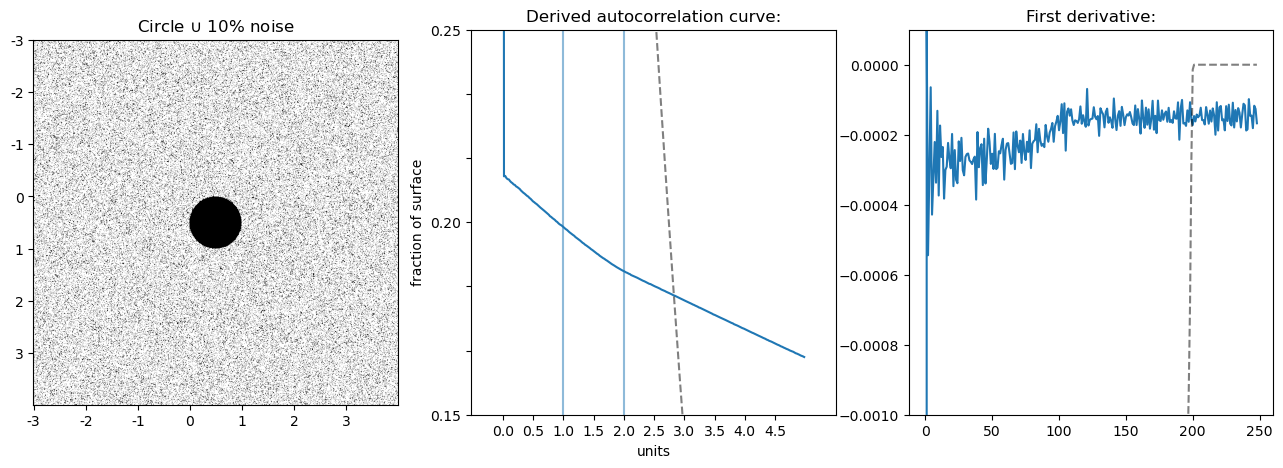

In [7]:
plt.figure(figsize=[16,5])

showcase3=[]
rad_ = 250
rad_cell=50
conveds = []

ftr = np.random.random([1600,1600])<0.8
mat = create_mat(radius=rad_cell,size=1600)
surf = mat.sum()
mat[ftr<0.1] = 1
mat=np.array([mat])

son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence = son.co_occurrence_from_tensor(hists=mat, interpolate=True)
showcase3 = co_occurrence.flatten()#/son.kernel_areas[::-1]


plt.subplot(1,3,1)
plt.imshow(mat.squeeze()[450:-450,450:-450],cmap='Greys')

xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    
plt.title('Circle $\cup$ 10% noise')


ax1 = plt.subplot(1,3,2)

plt.plot(showcase3)
plt.plot(showcase0,'k',linestyle='dashed',alpha=0.5)
xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0.15,0.25,7)
ytix = ['0.15','','','0.20','','','0.25',]
ax1.set_ylabel('fraction of circle surface')  # we already handled the x-label with ax1

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'

# ylox = np.arange(0,mat.squeeze()[250:-250,250:-250].sum(),surf//2)
plt.yticks(ylox,ytix)    
plt.xlabel('units')
plt.ylabel('fraction of surface')
# plt.ylim(*ax1.get_ylim())
# plt.plot(showcase3)

plt.vlines([rad_cell,rad_cell*2],0,showcase3.max(),alpha=0.5)
plt.hlines([surf,],*ax1.get_xlim(),alpha=0.3)

plt.ylim((0.15,0.25))

plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(showcase3)
               
plt.plot(diff)

diff = np.diff(showcase0)
plt.plot(diff,'k',linestyle='dashed',alpha=0.5)

plt.ylim(-0.001,0.0001)


# plt.savefig('./output/circle_bool_noise.svg')

Elipsoid. Skipped

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


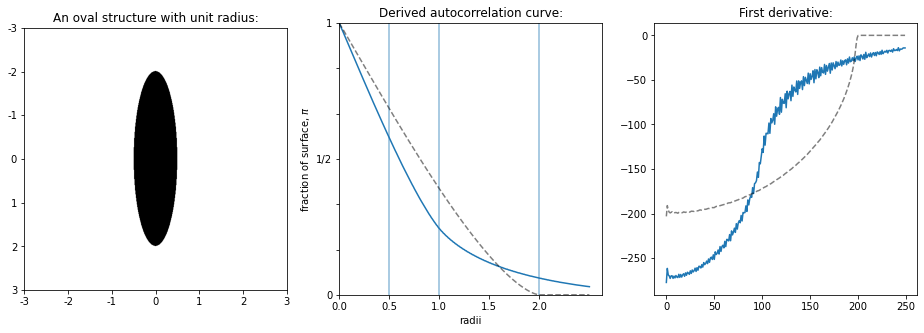

In [ ]:
plt.figure(figsize=[16,5])


def create_oval_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-((2*X)**2+(Y/2)**2)**0.5
    
    return (cone>(1-(radius/size*2)))

showcase1=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.array([create_oval_mat(radius=rad_cell,size=600)])

# for r in range(1,rad_):

#     rad = r
    
#     kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
#     kernel=kernel/kernel.sum()
#     conved = scipy.signal.fftconvolve(mat,kernel,mode='same')

#     plot1.append((conved*mat).sum())
    
    
son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=rad_, plot=False)
dm = son.distance_maps

showcase1 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

    
showcase1=np.array(showcase1)

plt.subplot(1,3,1)
plt.imshow(mat,cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('An oval structure with unit radius:')

plt.subplot(1,3,2)
plt.plot(showcase1)
plt.plot(showcase0,'k',linestyle='dashed',alpha=0.5)
xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,mat.sum(),mat.sum()//12)
ytix = ['0','','','1/2','','','1',]
# ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')

plt.vlines([rad_cell,rad_cell/2,rad_cell*2],0,showcase1.max(),alpha=0.5)

plt.ylim(0,mat.sum())

plt.xlim(0,None)

plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(showcase1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

diff = np.diff(showcase0)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]

plt.plot(diff,'k',linestyle='dashed',alpha=0.5)

plt.savefig('./output/oval.svg')

Showcase 4. Dots, equally distributed

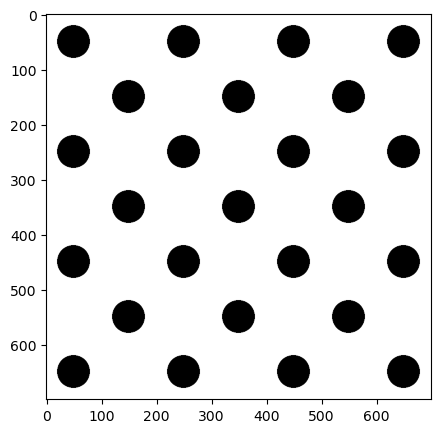

In [4]:
# create a dot matrix

plt.figure(figsize=[16,5])

showcase4=[]
rad_ = 500
rad_cell=30
conveds = []

mat = create_mat(radius=rad_cell,size=1200)

surf = mat.sum()

for i in range(20):
    mat = mat+np.roll(mat,200,0)

mat = mat + np.roll(np.roll(mat,int(100),0),int(100),1)

for i in range(20):
    mat = mat+np.roll(mat,200,1)

mat[:250]=0
mat[-250:]=0
mat[:,:250]=0
mat[:,-250:]=0
    
mat=np.array([mat]) 

plt.imshow(mat.squeeze()[250:-250,250:-250],cmap='Greys')

/tmp/ipykernel_3483540/2465652938.py:105: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(diff,'k', alpha=0.5, color='tab:blue')


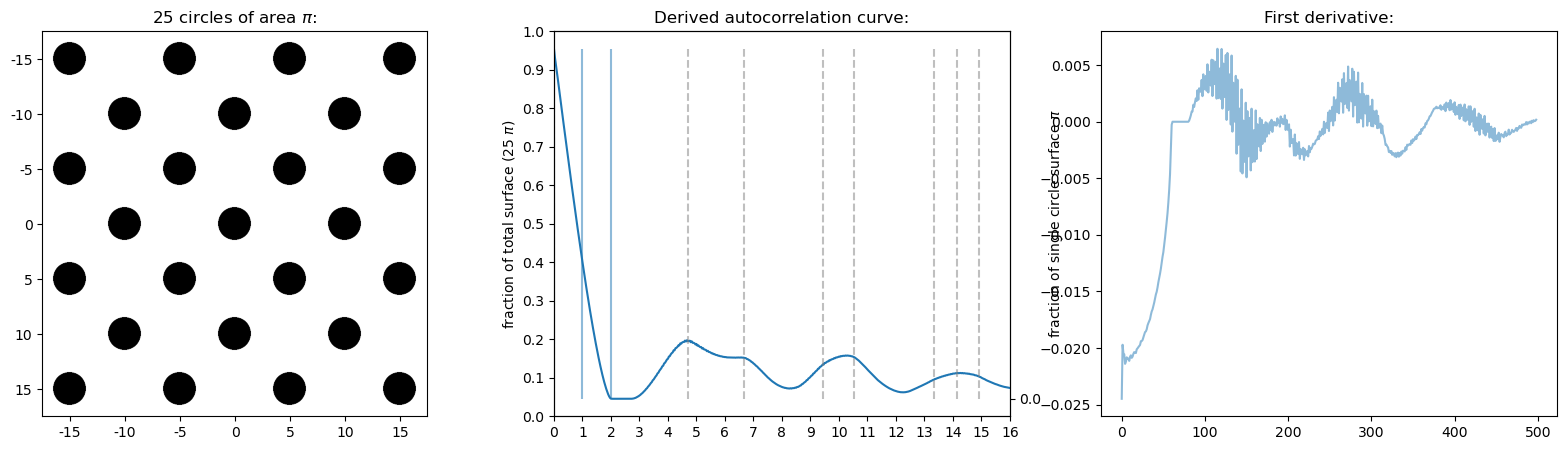

In [5]:
plt.figure(figsize=[20,5])

# showcase4=[]
# rad_ = 500
# rad_cell=30
# conveds = []

# mat = create_mat(radius=rad_cell,size=1200)

# surf = mat.sum()

# for i in range(20):
#     mat = mat+np.roll(mat,200,0)

# mat = mat + np.roll(np.roll(mat,int(100),0),int(100),1)

# for i in range(20):
#     mat = mat+np.roll(mat,200,1)

# mat[:250]=0
# mat[-250:]=0
# mat[:,:250]=0
# mat[:,-250:]=0
    
# mat=np.array([mat])    

# calculations on a dot matrix

son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence = son.co_occurrence_from_tensor(hists=mat, interpolate=True)
showcase4 = co_occurrence.flatten()


plt.subplot(1,3,1)
plt.imshow(mat.squeeze()[250:-250,250:-250],cmap='Greys')
    
xlox = np.linspace(0,700,15)[1::2]
xtix = [int(f) for f in (xlox-350)/20]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('25 circles of area $\pi$:')

# r45 = (2*30**2)**0.5/2
# roll45 = (2*100**2)**0.5
# plt.plot([350+r45,100+350-r45],[350+r45,100+350-r45],'r')

# plt.plot([350+r45,100+350+r45],[350-r45,100+350-r45],'orange')



# plt.subplot(1,3,2)
ax1 = plt.subplot(1,3,2)

# # plt.plot(plot1/3*np.arange(len(plot1))**0.5,'r')
xlox = np.arange(0,rad_,rad_cell)
xtix = xlox//rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')


ylox = np.linspace(0,mat.squeeze()[250:-250,250:-250].sum(),11)
plt.yticks(ylox,[ '%.1f'%f for f in ylox/mat.squeeze()[250:-250,250:-250].sum()])
ax1.set_ylabel('fraction of total surface (25 $\pi$)')  # we already handled the x-label with ax1

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
surf = np.pi*rad_cell**2
plt.xlabel('radii')


ylox = np.arange(0,mat.squeeze()[250:-250,250:-250].sum(),surf*5)
plt.yticks(ylox,[ '%.1f'%f for f in ylox/surf])


plt.xlabel('units')
plt.ylabel('fraction of single circle surface $\pi$')
# plt.ylim(*ax1.get_ylim())

plt.xlim(0,None)
plt.vlines([rad_cell,rad_cell*2],0,showcase4.max(),alpha=0.5)

plt.xlabel('radii')

dists=[]
for i in range(0,5):
    for j in range(0,5):
        if  not (i + j)%2:
            val = ((i*100)**2+(j*100)**2)**0.5
            if not val in dists:
                dists.append(val)

plt.plot(showcase4)        
plt.vlines(dists,0,showcase4.max(),alpha=0.5,linestyles='dashed',color='grey')




plt.subplot(1,3,3)

plt.title('First derivative:')
diff = np.diff(showcase4)
               
plt.plot(diff,'k', alpha=0.5, color='tab:blue')
# plt.savefig('./output/multi_circles.svg')

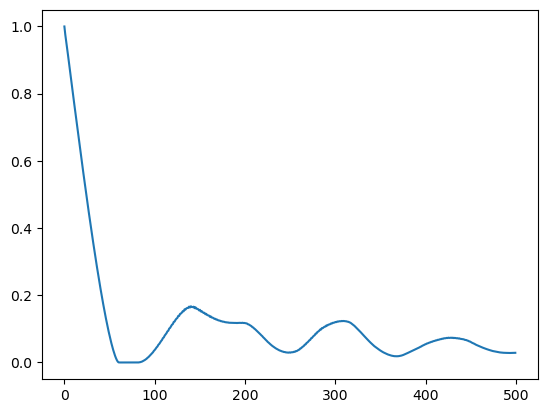

In [6]:
plt.plot(showcase4)        


In [81]:
showcase4.shape

(500,)

Showcase 5. correlation between different classes

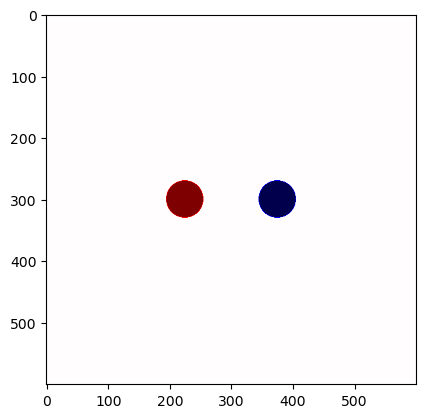

In [7]:
# plt.figure(figsize=[16,5])

showcase5_1=[]
showcase5_2=[]
rad_ = 500
rad_cell=30
conveds = []

mat1 = np.roll(create_mat(radius=rad_cell,size=600),-75,1)
mat2 = np.roll(mat1,150,1)
       
plt.imshow(mat1.astype(int)-mat2,cmap='seismic')

In [8]:
mat_total = np.array([mat1, mat2], np.int32)
mat_total.shape

(2, 600, 600)

In [9]:
son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence_rb = son.co_occurrence_from_tensor(hists=np.array([mat1,mat2]), interpolate=True)


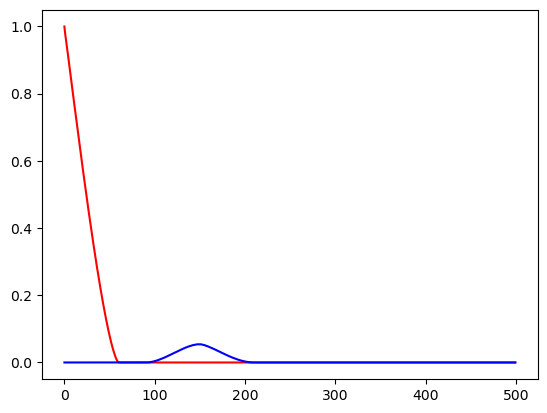

In [10]:
plt.plot(co_occurrence_rb[0,0], color = 'red')
plt.plot(co_occurrence_rb[1,0], color = 'blue')

In [87]:
co_occurrence_rb[1,0].shape

(500,)

In [13]:
co_oc2dots = co_occurrence_rb[1,0].flatten()

In [15]:
kernel_array = co_occurrence_rb[1,0].flatten()[90:210]

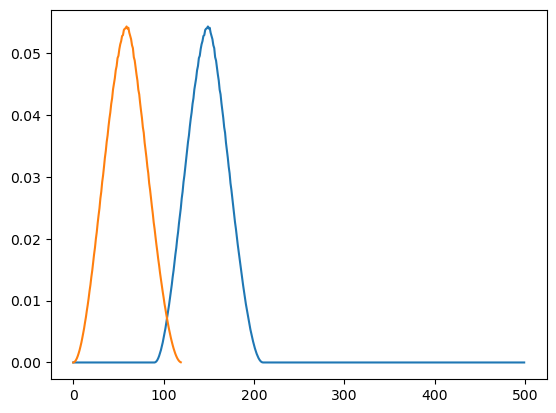

In [16]:
plt.plot(co_oc2dots)
plt.plot(kernel_array)

(-5e-09, 1e-08)

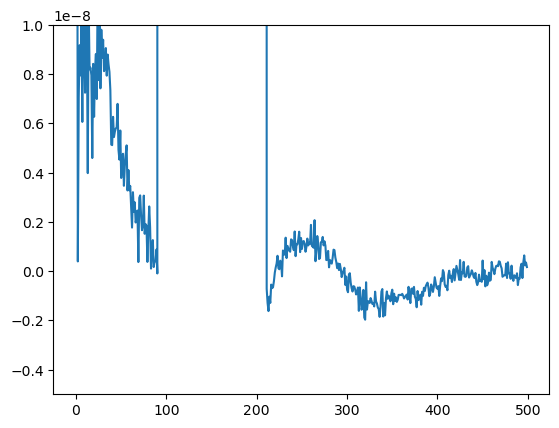

In [108]:
plt.plot(co_oc2dots)
plt.ylim(-0.000000005,0.00000001)

(-1.0, 1.0)

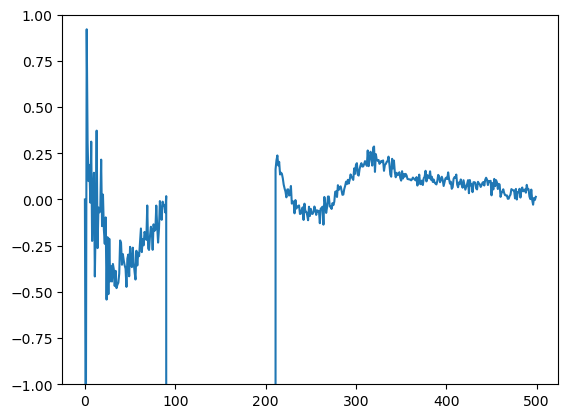

In [115]:
# deconvolved from the multiple dots signal
plt.plot(deconvolved_mult_dots[1]) 
plt.ylim(-1,1)

In [109]:
deconvolved = signal.deconvolve(co_oc2dots, kernel_array)

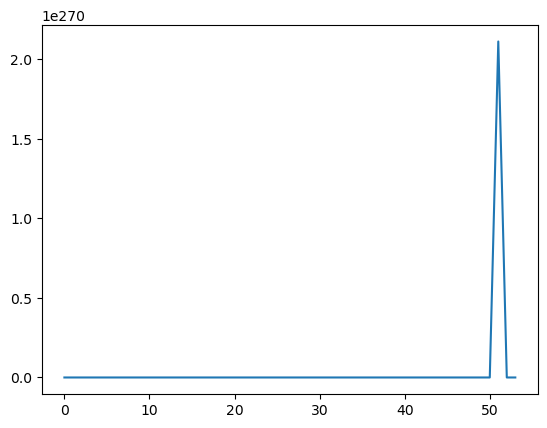

In [128]:
plt.plot(deconvolved[1])
# plt.plot(deconvolved[0])